# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Lecture 6 </span>

##  <span style="color:blue"> Exercise 6.1

Simulation of 1D Ising model with Metropolis and Gibbs sampling algorithms. 

Compute:
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

as a function of $T$ in the range $\left[0.5;2.0\right]$ for a system of $N=50$ spins with $J=1$.


### Equilibration 

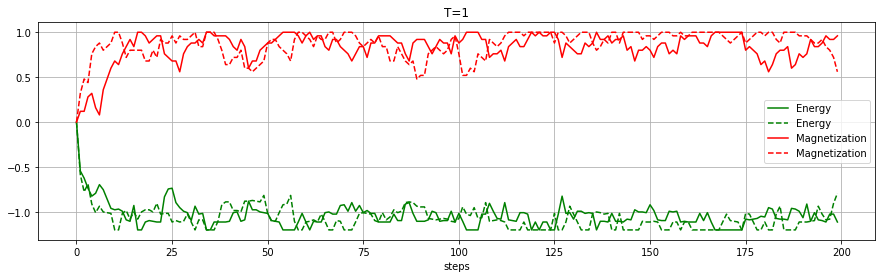

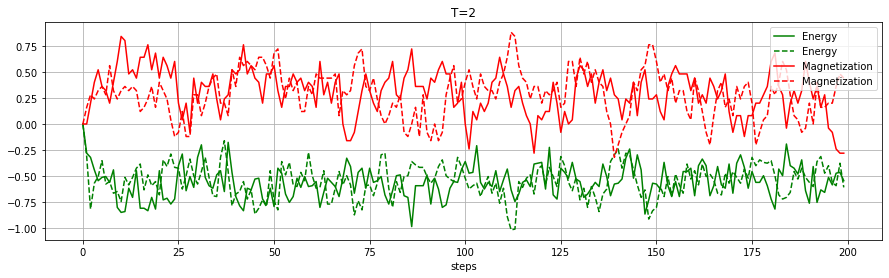

In [1]:
import numpy as np
import math
import matplotlib 
import matplotlib.pyplot as plt

def error(AV,AV2,n):  # Function for statistical uncertainty estimation
    if n==0:
        return 0
    else:
        return math.sqrt((AV2[n] - AV[n]**2)/n)

N=200
sum_prog1=np.zeros(N)
sum_prog2=np.zeros(N)
sum_prog3=np.zeros(N)
sum_prog4=np.zeros(N)
steps=np.arange(N)

#T=1 (h=0.2)

file1=open("./LSN_06.1/inst_energy_T1.0")
line1=file1.readlines()
for i in range(N):
    data1=line1[i].split()
    sum_prog1[i]=data1[1] 
file1.close()
file2=open("./LSN_06.1/inst_energy_T1.0altseed")
line1=file2.readlines()
for i in range(N):
    data1=line1[i].split()
    sum_prog2[i]=data1[1] 
file2.close()

file3=open("./LSN_06.1/inst_mag_T1.0")
line1=file3.readlines()
for i in range(N):
    data1=line1[i].split()
    sum_prog3[i]=data1[1] 
file3.close()
file4=open("./LSN_06.1/inst_mag_T1.0altseed")
line1=file4.readlines()
for i in range(N):
    data1=line1[i].split()
    sum_prog4[i]=data1[1] 
file4.close()

plt.figure(figsize=(15, 4))
plt.plot(steps,sum_prog1,'-',label='Energy',color='g')
plt.plot(steps,sum_prog2,'--',label='Energy',color='g')
plt.plot(steps,sum_prog3,'-',label='Magnetization',color='r')
plt.plot(steps,sum_prog4,'--',label='Magnetization',color='r')
plt.xlabel("steps")
plt.grid(True)
plt.title("T=1")
plt.legend()
plt.show()

#T=1 (h=0.2)

file1=open("./LSN_06.1/inst_energy_T2.0")
line1=file1.readlines()
for i in range(N):
    data1=line1[i].split()
    sum_prog1[i]=data1[1] 
file1.close()
file2=open("./LSN_06.1/inst_energy_T2.0altseed")
line1=file2.readlines()
for i in range(N):
    data1=line1[i].split()
    sum_prog2[i]=data1[1] 
file2.close()

file3=open("./LSN_06.1/inst_mag_T2.0")
line1=file3.readlines()
for i in range(N):
    data1=line1[i].split()
    sum_prog3[i]=data1[1] 
file3.close()
file4=open("./LSN_06.1/inst_mag_T2.0altseed")
line1=file4.readlines()
for i in range(N):
    data1=line1[i].split()
    sum_prog4[i]=data1[1] 
file4.close()

plt.figure(figsize=(15, 4))
plt.plot(steps,sum_prog1,'-',label='Energy',color='g')
plt.plot(steps,sum_prog2,'--',label='Energy',color='g')
plt.plot(steps,sum_prog3,'-',label='Magnetization',color='r')
plt.plot(steps,sum_prog4,'--',label='Magnetization',color='r')
plt.xlabel("steps")
plt.grid(True)
plt.title("T=2")
plt.legend()
plt.show()

In the above pictures, the trends for the instantaneous values of two relevant observables (internal energy and magnetization) are shown, in the T=1 and T=2 cases (arbitrarily chosen). In all cases an external field $h=0.2$ was imposed in order to better visualize the trend for the magnetization (remember that the starting configuration is disordered). All runs are 1000 steps long, but only the first 200 are shown. Solid vs. dashed line refers to two different seeds for the PRN generator. 

* For every fixed T, the equilibration time features no substantial dependence on the observable chosen nor on the initial seed
* The equilibration time turns out to be very short: already after O(10) steps the instantaneous values start fluctuating around their average (as expected for the canonical ensemble, where neither $E$ nor $m$ are fixed)
* Still, after equilibration, fluctuations remain quite large, especially in the higher-T case

### Statistical estimate of observables

The graphs below refer to the T=2 case (arbitrarily chosen). Data blocking parameters: 50 blocks with $10^5$ steps/block. Equilibration is done for 1000 steps, then the real simulation is performed on the basis of the obtained configuration.

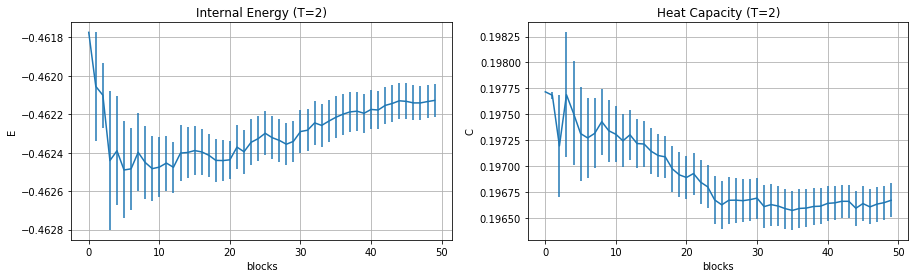

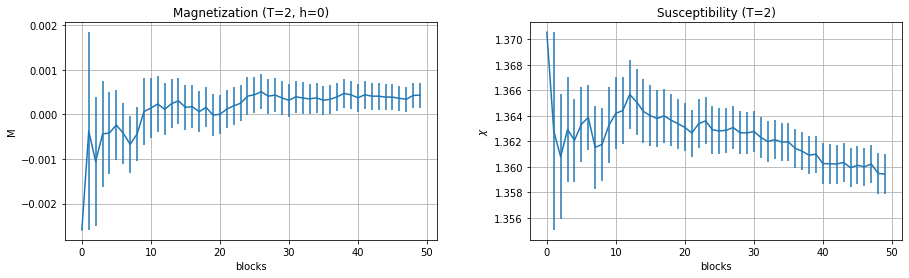

In [2]:
import numpy as np
import math
import matplotlib 
import matplotlib.pyplot as plt

def error(AV,AV2,n):  # Function for statistical uncertainty estimation
    if n==0:
        return 0
    else:
        return math.sqrt((AV2[n] - AV[n]**2)/n)

N=50
sum_prog=np.zeros(N)
err_prog=np.zeros(N)
sum_prog2=np.zeros(N)
err_prog2=np.zeros(N)
steps=np.arange(N)

#Energy & heat capacity

file1=open("./LSN_06.1/T_2.0/output.ene.1")
line1=file1.readlines()
for i in range(N):
    data1=line1[i].split()
    sum_prog[i]=data1[2]
    err_prog[i]=data1[3] 
file1.close()

file2=open("./LSN_06.1/T_2.0/output.cv.1")
line2=file2.readlines()
for i in range(N):
    data2=line2[i].split()
    sum_prog2[i]=data2[2]
    err_prog2[i]=data2[3] 
file2.close() 

plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
plt.errorbar(steps,sum_prog,yerr=err_prog)
plt.xlabel("blocks")
plt.ylabel("E")
plt.grid(True)
plt.title("Internal Energy (T=2)")

plt.subplot(1, 2, 2)
plt.errorbar(steps,sum_prog2,yerr=err_prog2)
plt.xlabel("blocks")
plt.ylabel("C")
plt.grid(True)
plt.title("Heat Capacity (T=2)")

plt.subplots_adjust(wspace=0.2)
plt.show()

#Susceptibility & magnetization

file3=open("./LSN_06.1/T_2.0/output.mag.1")
line3=file3.readlines()
for i in range(N):
    data3=line3[i].split()
    sum_prog[i]=data3[2]
    err_prog[i]=data3[3] 
file3.close()

file4=open("./LSN_06.1/T_2.0/output.chi.1")
line4=file4.readlines()
for i in range(N):
    data4=line4[i].split()
    sum_prog2[i]=data4[2]
    err_prog2[i]=data4[3] 
file4.close()  

plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
plt.errorbar(steps,sum_prog,yerr=err_prog)
plt.xlabel("blocks")
plt.ylabel("M")
plt.grid(True)
plt.title("Magnetization (T=2, h=0)")

plt.subplot(1, 2, 2)
plt.errorbar(steps,sum_prog2,yerr=err_prog2)
plt.xlabel("blocks")
plt.ylabel("$\chi$")
plt.grid(True)
plt.title("Susceptibility (T=2)")

plt.subplots_adjust(wspace=0.25)
plt.show()

### Internal Energy, Heat Capacity, Magnetization, Susceptibility vs. T

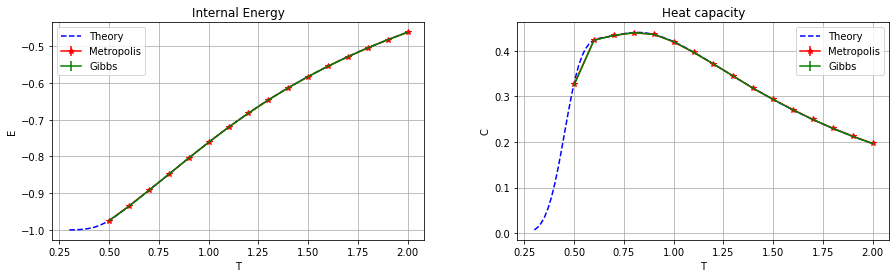

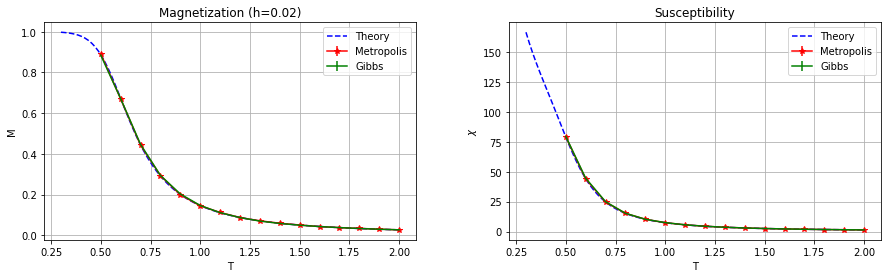

In [3]:
#ENERGY & HEAT CAPACITY

############################################
#Theoretical model
points=100
Tt = np.linspace(0.3,2.0,num=points)
beta = 1/Tt
J = 1.0
Ns = 50
th = np.tanh(J/Tt)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2) 
############################################

temp=np.zeros(16)
val=np.zeros(16)
err_val=np.zeros(16)
val2=np.zeros(16)
err_val2=np.zeros(16)
val3=np.zeros(16)
err_val3=np.zeros(16)
val4=np.zeros(16)
err_val4=np.zeros(16)

#Energy
T=0.5
for i in range(16):
    temp[i]=T
    file=open("./LSN_06.1/T_"+str(round(T,1))+"/output.ene.1")
    line=file.readlines()
    data=line[N-1].split()
    val[i]=data[2]
    err_val[i]=data[3]
    T=T+0.10
    
T=0.5
for i in range(16):
    temp[i]=T
    file=open("./LSN_06.1/T_"+str(round(T,1))+"/output.ene.0")
    line=file.readlines()
    data=line[N-1].split()
    val2[i]=data[2]
    err_val2[i]=data[3]
    T=T+0.10

#Heat capacity
T=0.5
for i in range(16):
    temp[i]=T
    file=open("./LSN_06.1/T_"+str(round(T,1))+"/output.cv.1")
    line=file.readlines()
    data=line[N-1].split()
    val3[i]=data[2]
    err_val3[i]=data[3]
    T=T+0.10
    
T=0.5
for i in range(16):
    temp[i]=T
    file=open("./LSN_06.1/T_"+str(round(T,1))+"/output.cv.0")
    line=file.readlines()
    data=line[N-1].split()
    val4[i]=data[2]
    err_val4[i]=data[3]
    T=T+0.10

#Plot
plt.figure(figsize=(15, 4))

plt.subplot(1,2,1)
plt.errorbar(temp,val,yerr=err_val,label='Metropolis',color='r',marker='*')
plt.errorbar(temp,val2,yerr=err_val2,label='Gibbs',color='g') 
plt.plot(Tt,e,label='Theory',color='b',linestyle='dashed')
plt.xlabel("T")
plt.ylabel("E")
plt.grid(True)
plt.title("Internal Energy")
plt.legend()

plt.subplot(1,2,2)
plt.errorbar(temp,val3,yerr=err_val3,label='Metropolis',color='r',marker='*')
plt.errorbar(temp,val4,yerr=err_val4,label='Gibbs',color='g') 
plt.plot(Tt, heat,label='Theory',color='b',linestyle='dashed')
plt.xlabel("T")
plt.ylabel("C")
plt.grid(True)
plt.title("Heat capacity")
plt.legend()

plt.subplots_adjust(wspace=0.25)
plt.show()

#MAGNETIZATION & SUSCEPTIBILITY

############################################
#Theoretical model
h=0.02 #external field
b = 1/Tt
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
X = b*np.exp(2*b*J)*(1-thN)/(1+thN)
############################################

#Magnetization
T=0.5
for i in range(16):
    temp[i]=T
    file=open("./LSN_06.1/T_"+str(round(T,1))+"/output.mag.h_ext.1")
    line=file.readlines()
    data=line[N-1].split()
    val[i]=data[2]
    err_val[i]=data[3]
    T=T+0.10
    
T=0.5
for i in range(16):
    temp[i]=T
    file=open("./LSN_06.1/T_"+str(round(T,1))+"/output.mag.h_ext.0")
    line=file.readlines()
    data=line[N-1].split()
    val2[i]=data[2]
    err_val2[i]=data[3]
    T=T+0.10

#Susceptibility
T=0.5
for i in range(16):
    temp[i]=T
    file=open("./LSN_06.1/T_"+str(round(T,1))+"/output.chi.1")
    line=file.readlines()
    data=line[N-1].split()
    val3[i]=data[2]
    err_val3[i]=data[3]
    T=T+0.10
    
T=0.5
for i in range(16):
    temp[i]=T
    file=open("./LSN_06.1/T_"+str(round(T,1))+"/output.chi.0")
    line=file.readlines()
    data=line[N-1].split()
    val4[i]=data[2]
    err_val4[i]=data[3]
    T=T+0.10

#Plot
plt.figure(figsize=(15, 4))

plt.subplot(1,2,1)
plt.errorbar(temp,val,yerr=err_val,label='Metropolis',color='r',marker='*')
plt.errorbar(temp,val2,yerr=err_val2,label='Gibbs',color='g') 
plt.plot(Tt,M,label='Theory',color='b',linestyle='dashed')
plt.xlabel("T")
plt.ylabel("M")
plt.grid(True)
plt.title("Magnetization (h=0.02)")
plt.legend()

plt.subplot(1,2,2)
plt.errorbar(temp,val3,yerr=err_val3,label='Metropolis',color='r',marker='*')
plt.errorbar(temp,val4,yerr=err_val4,label='Gibbs',color='g') 
plt.plot(Tt, X,label='Theory',color='b',linestyle='dashed')
plt.xlabel("T")
plt.ylabel("$\chi$")
plt.grid(True)
plt.title("Susceptibility")
plt.legend()
plt.subplots_adjust(wspace=0.25)
plt.show()